# Feature Engineering

### Importing libraries

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import os
import pywt
import pandas as pd
%matplotlib inline


# importing libraries required for model building and 

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# importing a library for visualization

import seaborn as sn

# importing libraries to save the ML model and create JSON files

import joblib 
import json


### Creating a list of all folder names

In [2]:
def list_folders(directory):
    folders = []
    for entry in os.listdir(directory):
        full_path = os.path.join(directory, entry)
        if os.path.isdir(full_path):
            folders.append(entry)
    return folders

# Specify the directory you want to list folders from
directory_path = 'cropped_images/'

# Get the list of folder names
folder_names = list_folders(directory_path)

# folder_names

### Creating a dictionary of player name with all the image paths

In [3]:

# Creating a list of folder names of cropped images

cropped_folder_list = folder_names

folder_path_dict = {'Name':[],
                    'Paths':[]}



for folder_name in cropped_folder_list:
    
    list_1 = []

    folder_path = 'cropped_images'+'/{}'.format(folder_name)

    # Get a list of all files and directories in the specified folder
    files_and_directories = os.listdir(folder_path)

    # Filter only files (not directories) if needed
    files = [f for f in files_and_directories if os.path.isfile(os.path.join(folder_path, f))]

    # Now 'files' contains a list of file names in the folder
    # You can also get the full paths by using os.path.join() on each file name
    file_paths = [os.path.join(folder_path, f) for f in files]
    
    # changing the folder name into a proper name to be used as the dictionary key
    
    original_string = folder_name

    # Split the string based on underscores
    parts = original_string.split('_')

    # Join the first two parts with spaces
    clean_name = ' '.join(parts[:2])


    # Print the file paths
    for file_path in file_paths:
        list_1.append(file_path)
    
    folder_path_dict['Name'].append(clean_name)
    folder_path_dict['Paths'].append(list_1)
    
# folder_path_dict

In [4]:
# check

folder_path_dict['Name']

['alex albon',
 'carlos sainz',
 'charles leclerc',
 'daniel ricciardo',
 'esteban ocon',
 'fernando alonso',
 'george russell',
 'kevin magnussen',
 'lance stroll',
 'lando norris',
 'lewis hamilton',
 'logan sargeant',
 'max verstappen',
 'nico hulkenberg',
 'oscar piastri',
 'pierre gasly',
 'sergio perez',
 'valtteri bottas',
 'yuki tsunoda',
 'zhou guanyu']

In [5]:
# folder_path_dict['Paths']

### Converting racer names into numeric classes

In [6]:
class_dict = {}

count = 0
for racer_name in folder_path_dict['Name']:
    class_dict[racer_name] = count
    count = count + 1
    
class_dict

{'alex albon': 0,
 'carlos sainz': 1,
 'charles leclerc': 2,
 'daniel ricciardo': 3,
 'esteban ocon': 4,
 'fernando alonso': 5,
 'george russell': 6,
 'kevin magnussen': 7,
 'lance stroll': 8,
 'lando norris': 9,
 'lewis hamilton': 10,
 'logan sargeant': 11,
 'max verstappen': 12,
 'nico hulkenberg': 13,
 'oscar piastri': 14,
 'pierre gasly': 15,
 'sergio perez': 16,
 'valtteri bottas': 17,
 'yuki tsunoda': 18,
 'zhou guanyu': 19}

### Creating a function for wavelet transforming

In [7]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


# Model Improvement Section

- Raw image resized to 32x32 (m_1)
- Raw image resized to 64x64 (m_2)
- Histogram equalized image at 64x64 (m_3)
- Raw image resized at 64x64 + Histogram equalized image at 64x64 (vertically stacked) (m_4)

### Creating the X and y variables for model training

In [8]:
X_raw,y_raw = [], []
X, y = [], []
for racer_name, training_files in zip(folder_path_dict['Name'],folder_path_dict['Paths']):
    for training_image in training_files: 

        img = cv2.imread(training_image)
        if img is None:
            continue
        # m_1
        scaled_raw_img = cv2.resize(img,(32,32))
        
        final_img = scaled_raw_img.reshape(32*32*3,1)
        
        X_raw.append(scaled_raw_img)
        y_raw.append(class_dict[racer_name]) 
            
        X.append(final_img)
        y.append(class_dict[racer_name]) 


In [9]:
len(X)

1895

In [10]:
# X is a list of arrays

In [11]:
# X

In [12]:
x_1 = np.array(X)
x_1.shape

(1895, 3072, 1)

In [13]:
# x_1

### Reshaping X and also updating the numbers to be as float

In [14]:
X = np.array(X).reshape(len(X),3072).astype(float)
X.shape

(1895, 3072)

In [15]:
# print(X)

In [16]:
# break

## 1. Raw image resized to 32x32

In [17]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state=0)

# pipe_1 = Pipeline([('scaler', StandardScaler()), # Step 1: Standardize the data
#                  ('svc', SVC(kernel = 'rbf', C = 10)) # Step 2: Train a model
#                 ])

# pipe_1.fit(X_train_1, y_train_1)
# m_1 = pipe_1.score(X_test_1, y_test_1)
# print(m_1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, random_state=0)

### Hyperparameter Tuning (SVM vs Random Forest vs Logistic Regression)

##### We are only using 32x32 (m_1) data for hyperparameter tuning due to low computaional power of my PC

In [19]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [20]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_1, y_train_1)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.598152,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.253385,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.644608,{'logisticregression__C': 1}


In [21]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

### Testing the model performance with the test data set (not the validation data set as done in the hyperparemeter tuning step)

In [22]:
print(f"Accuracy of the SVM Model is {best_estimators['svm'].score(X_test_1,y_test_1)}")
print(f"Accuracy of the Random Forest Model is {best_estimators['random_forest'].score(X_test_1,y_test_1)}")
print(f"Accuracy of the Logistic Regression Model is {best_estimators['logistic_regression'].score(X_test_1,y_test_1)}")

Accuracy of the SVM Model is 0.6223628691983122
Accuracy of the Random Forest Model is 0.2721518987341772
Accuracy of the Logistic Regression Model is 0.6624472573839663


In [23]:
# break

In [24]:
X_test_1[2].shape

(3072,)

In [25]:
# plot_sample(X_test, y_test, class_dict, 2)

NameError: name 'plot_sample' is not defined

In [26]:
# creating a fucntion to get the key when a value is given

def get_key_from_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None 

# plot a sample of the image being tested

def plot_sample(X,y, dicti,index):
    plt.figure(figsize = (15,3))
    plt.imshow(X[index])
    plt.xlabel(get_key_from_value(dicti,y[index]))


def check_output(x):
    
    # predicting the driver
    
    prediction = np.round(best_estimators['logistic_regression'].predict(np.expand_dims(X_test_1[x], axis=0))[0])
    
    
    # finding the probabilities assigned to each driver by the LR model

    percentages = np.round(best_estimators['logistic_regression'].predict_proba(X_test_1[x].reshape(1,-1))*100,1)[0]
    
    
    #finding the highest probability from the above list

    highest_perc = np.max(percentages)
    
    
    # formatting

    converted_array = np.array([("{:.2f}".format(number)) for number in percentages])

    converted_highest_perc = "{:.2f}%".format(highest_perc)

    driver_name = f"The predicted driver is {get_key_from_value(class_dict,prediction)} with a {converted_highest_perc} probability"
    
    plot_sample(X_test,y_test,class_dict,x) 

    return driver_name

'The predicted driver is oscar piastri with a 77.10% probability'

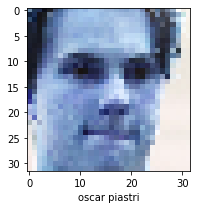

In [31]:
check_output(20)

### <font color='yellow'> Since the best performing model is Logistic regression, we will be using that in our next steps <font/>

## 2. Raw image resized to 64x64 (m_2)

In [36]:
X, y = [], []
for racer_name, training_files in zip(folder_path_dict['Name'],folder_path_dict['Paths']):
    for training_image in training_files: 
        # print(racer_name)
        # print(training_image)
        img = cv2.imread(training_image)
        if img is None:
            continue
        # m_1
        # scaled_raw_img = cv2.resize(img,(32,32))
        
        # m_2
        scaled_raw_img = cv2.resize(img,(64,64))
        
        # m_3
        # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # equ = cv2.equalizeHist(img_gray)
        # scaled_img_hist = cv2.resize(equ, (64, 64))
        
        # m_4
        # combined_img = np.vstack((scaled_raw_img.reshape(64*64*3,1),scaled_img_hist.reshape(64*64,1)))
        
        
        # reshaped final image
        
        # m_1
        # final_img = scaled_raw_img.reshape(32*32*3,1)
        
        # m_2
        final_img = scaled_raw_img.reshape(64*64*3,1) 
        
         # m_3
        # final_img = scaled_img_hist.reshape(64*64,1)
        
        # m_4
        
        # final_img = combined_img.reshape(64*64*4,1)
        
        
        X.append(final_img)
        y.append(class_dict[racer_name]) 
        

In [37]:
X = np.array(X).reshape(len(X),12288).astype(float)
X.shape

(1895, 12288)

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe_2 = Pipeline([('scaler', StandardScaler()), # Step 1: Standardize the data
                 ('logisticregression', LogisticRegression(solver = 'liblinear', C = 1)) # Step 2: Train a model
                ])

pipe_2.fit(X_train, y_train)
m_2 = pipe_2.score(X_test, y_test)
print(m_2)

0.6455696202531646


In [ ]:
y_test[5]

### Checking what the model output is

In [ ]:


prediction = pipe_2.predict((X_test[5].reshape(1,-1)))[0]

print(prediction)
print(type(prediction))


In [ ]:
percentages = (np.round(pipe_2.predict_proba(X_test[5].reshape(1,-1))[0]*100,decimals=2).tolist()[0])

converted_array = np.array([("{:.2f}".format(number)) for number in percentages])

print(converted_array)
print(type(converted_array))
print(converted_array.shape)

In [ ]:
# break

### Saving the model as pickle file  and create a class dictionary as a JSON file

In [33]:
best_clf = best_estimators['logistic_regression']

In [39]:
# Save the model as a pickle in a file 

import pickle

pickle.dump(pipe_2, open('server/artifacts/saved_model.pkl', 'wb'))

In [35]:
with open("server/artifacts/class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [ ]:
break

# <font color='red'> ^^^^^^^^^^^^ Only include upto here in your article <font/>

## 3. Histogram equalized image at 64x64 (m_3)

In [ ]:
X, y = [], []
for racer_name, training_files in zip(folder_path_dict['Name'],folder_path_dict['Paths']):
    for training_image in training_files: 
        # print(racer_name)
        # print(training_image)
        img = cv2.imread(training_image)
        if img is None:
            continue
        # m_1
        # scaled_raw_img = cv2.resize(img,(32,32))
        
        # m_2
        # scaled_raw_img = cv2.resize(img,(64,64))
        
        # m_3
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        equ = cv2.equalizeHist(img_gray)
        scaled_img_hist = cv2.resize(equ, (64, 64))
        
        # m_4
        # combined_img = np.vstack((scaled_raw_img.reshape(64*64*3,1),scaled_img_hist.reshape(64*64,1)))
        
        
        # reshaped final image
        
        # m_1
        # final_img = scaled_raw_img.reshape(32*32*3,1)
        
        # m_2
        # final_img = scaled_raw_img.reshape(64*64*3,1) 
        
         # m_3
        final_img = scaled_img_hist.reshape(64*64,1)
        
        # m_4
        
        # final_img = combined_img.reshape(64*64*4,1)
        
        
        X.append(final_img)
        y.append(class_dict[racer_name]) 

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe_3 = Pipeline([('scaler', StandardScaler()), # Step 1: Standardize the data
                 ('logisticregression', LogisticRegression(solver = 'liblinear', C = 1)) # Step 2: Train a model
                ])

pipe_3.fit(X_train, y_train)
m_3 = pipe_3.score(X_test, y_test)
print(m_3)

## 4. Raw image resized at 64x64 + Histogram equalized image at 64x64 (vertically stacked) (m_4)

In [ ]:
X, y = [], []
for racer_name, training_files in zip(folder_path_dict['Name'],folder_path_dict['Paths']):
    for training_image in training_files: 
        # print(racer_name)
        # print(training_image)
        img = cv2.imread(training_image)
        if img is None:
            continue
        # m_1
        # scaled_raw_img = cv2.resize(img,(32,32))
        
        # m_2
        # scaled_raw_img = cv2.resize(img,(64,64))
        
        # m_3
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        equ = cv2.equalizeHist(img_gray)
        scaled_img_hist = cv2.resize(equ, (64, 64))
        
        # m_4
        combined_img = np.vstack((scaled_raw_img.reshape(64*64*3,1),scaled_img_hist.reshape(64*64,1)))
        
        
        # reshaped final image
        
        # m_1
        # final_img = scaled_raw_img.reshape(32*32*3,1)
        
        # m_2
        # final_img = scaled_raw_img.reshape(64*64*3,1) 
        
         # m_3
        # final_img = scaled_img_hist.reshape(64*64,1)
        
        # m_4
        
        final_img = combined_img.reshape(64*64*4,1)
        
        
        X.append(final_img)
        y.append(class_dict[racer_name]) 

In [ ]:
X = np.array(X).reshape(len(X),16384).astype(float)
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe_4 = Pipeline([('scaler', StandardScaler()), # Step 1: Standardize the data
                 ('logisticregression', LogisticRegression(solver = 'liblinear', C = 1)) # Step 2: Train a model
                ])

pipe_4.fit(X_train, y_train)
m_4 = pipe_4.score(X_test, y_test)

In [ ]:
## Creating a summary table of all the methods used and their performance

methods = ["m_1", "m_2", "m_3","m_4"]
prediction_scores = [m_1, m_2, m_3, m_4]

# Create a DataFrame
df = pd.DataFrame({"Method": methods, "Prediction Scores": prediction_scores})

# Display the DataFrame
print(df)

## Create a classification report that provides precision, recall, and F1-score

In [ ]:
print(classification_report(y_test, pipe_4.predict(X_test)))

In [ ]:
# seems like the best we can get is 59% accuracy 
# we might have to explore CNN 

# - https://www.youtube.com/watch?v=7HPwo4wnJeA
# - https://www.codemag.com/Article/2205081/Implementing-Face-Recognition-Using-Deep-Learning-and-Support-Vector-Machines
# - https://thinkingneuron.com/face-recognition-using-deep-learning-cnn-in-python/


In [ ]:
break

### Choosing the best performing model

In [ ]:


best_clf = best_estimators['svm']


In [ ]:
best_clf.predict(X_test)

In [ ]:
X_test[5]


In [ ]:
best_clf.predict(X_test[5].reshape(1,-1))

### Plotting the confusion matrix

In [ ]:


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm



In [ ]:

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
class_dict

### Saving the model as pickle file  and create a class dictionary as a JSON file

In [ ]:
# Save the model as a pickle in a file 
import pickle

pickle.dump(best_clf, open('saved_model.pkl', 'wb'))

In [ ]:
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

